# Hybrid Recommender System

A recommender system, or a recommendation system, can be thought of as a subclass of information filtering system that seeks to predict the best “rating” or “preference” a user would give to an item which is typically obtained by optimizing for objectives like total clicks, total revenue, and overall sales.

Broadly speaking, most recommender systems leverage two types of data:
* Interaction Data, such as ratings, and browsing behaviors, and
* Attribution Information, about each user and items

The modeling approach relying on the former data is generally known Collaborative Filtering method, and the approach using the latter is referred to as the Content-Base Filtering method. There is also another category known as Knowledge-Based recommender system that is based on explicitly specified user requirements.
Of course, each of these methods has its strengths and weaknesses depending on which applications they are used for, and the amount of data available.
Hybrid Systems are then used to combined the advantages of these approaches to have a robust performing system across a wide variety of applications.


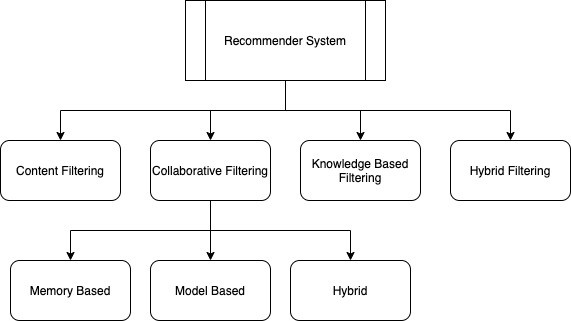


* **Collaborative Filtering Methods:** 

These types of models use the collaborative power of the ratings provided by multiple users to make recommendations and rely mostly on leveraging either inter-item correlations or inter-user interactions for the prediction process. Intuitively, it relies on an underlying notion that two users who rate items similarly are likely to have comparable preferences for other items.

There are two types of methods that are commonly used in collaborative filtering:

**Memory-based** methods also referred to as neighborhood-based collaborative filtering algorithms, where ratings of user-item combinations are predicted based on their neighborhoods. These neighborhoods can be further defined as (1) User Based, and (2) Item Based.

In **Model-based** methods, ML techniques are used to learn model parameters within the context of a given optimization framework

* **Content Based Filtering Methods:**

In these types of systems, the descriptive attributes of items/users are used to make recommendations. The term “content” refers to these descriptions. In content-based methods, the ratings and interaction behavior of users are combined with the content information available in the items.

* **Hybrid Methods:** 

In many cases, a wider variety of inputs is available; in such cases, many opportunities exist for hybridization, where the various aspects from different types of systems are combined to achieve the best of all worlds. The approach is comparable to the conventional ensemble analysis approach, where the power of multiple types of machine learning algorithms is combined to create a more robust model.

# What Is Collaborative Filtering?

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions. There are many ways to decide which users are similar and combine their choices to create a list of recommendations. 


**Item-Based Collaborative Filtering** is the recommendation system to use the similarity between items using the ratings by users. 

**User-Based Collaborative Filtering** is a technique used to predict the items that a user might like on the basis of ratings given to that item by the other users who have similar taste with that of the target user. Many websites use collaborative filtering for building their recommendation system.

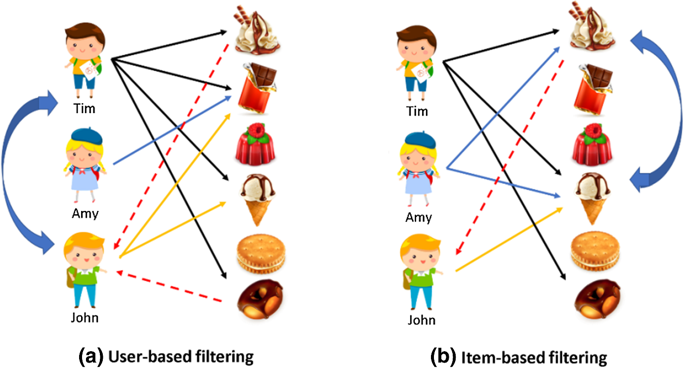



# Business Problem

Estimate using the item-based and user-based recommender methods for the user whose ID is given.

# Dataset and Story

MovieLens, a movie recommendation service, provided the dataset. It contains the rating scores for these movies along with the movies.

It contains 2,000,0263 ratings across 27,278 movies. This data was created by 138,493 users between 09 January 1995 and 31 March 2015. This data set was created on October 17, 2016. Users are randomly selected. It is known that all selected users voted for at least 20 movies.

**Variables of the data set:**

**movie.csv**
- movieId – Unique movie number. (UniqueID) 
- title – Movie name

**rating.csv**
* userid – Unique user number. (UniqueID) 
* movieId – Unique movie number. (UniqueID) 
* rating – The rating given to the movie by the user
* timestamp – Evaluation date

# Load Dataset


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import pandas as pd
# pd.set_option('display.max_columns', 20)
# movie = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")
# rating = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")

# df = movie.merge(rating, how="left", on="movieId")
# df.head()

In [3]:
df = pd.read_csv("/kaggle/input/data-bakery/data.csv")

In [4]:
df.head(5)

TransactionNo          Items             DateTime  Daypart  DayType  \
0              1          Bread  2016-10-30 09:58:11  Morning  Weekend   
1              2   Scandinavian  2016-10-30 10:05:34  Morning  Weekend   
2              2   Scandinavian  2016-10-30 10:05:34  Morning  Weekend   
3              3  Hot chocolate  2016-10-30 10:07:57  Morning  Weekend   
4              3            Jam  2016-10-30 10:07:57  Morning  Weekend   

      User  Rating                                           overview  
0   Gloria       3  A staple food made from flour, water, and yeas...  
1   Louise       5  Reflecting the flavors of Northern Europe, Sca...  
2   Daniel       5  Reflecting the flavors of Northern Europe, Sca...  
3  Shannon       4  Though not a cake in the traditional sense, ho...  
4   Manuel       3  A sweet spread made from fruits, commonly used...

In [5]:
df.shape

(20507, 8)

# Let's Start!

In [6]:
# Let's find the unique movies:
df["Items"].nunique()

94

In [7]:
#Let's see how many comments were made on which movie:
df["Items"].value_counts().head()

Coffee    5471
Bread     3325
Tea       1435
Cake      1025
Pastry     856
Name: Items, dtype: int64

In [8]:
# # Let's get to the movies with less than 1000 reviews:
# comment_counts = pd.DataFrame(df["Items"].value_counts())
# rare_items = comment_counts[comment_counts["Items"] <= 1000].index

# # Let's get access to movies with over 1000 reviews:
# common_items = df[~df["Items"].isin(rare_items)]
# common_items.shape

In [9]:
# Unique movies with more than 1000 reviews:
# common_items["Items"].nunique()

In [10]:
# Let's create the User Movie Df:
user_item_df = df.pivot_table(index=["User"], columns=["Items"], values="Rating")

# There are 3159 movies that 138493 users have voted for. 
user_item_df.shape

(503, 94)

In [11]:
user_item_df.head(10)

Items    Adjustment  Afternoon with the baker  Alfajores  Argentina Night  \
User                                                                        
Aaron           NaN                       2.0        NaN              NaN   
Abigail         NaN                       NaN        NaN              NaN   
Adam            NaN                       0.0        0.0              NaN   
Adrian          NaN                       NaN        NaN              NaN   
Agnes           NaN                       NaN        NaN              NaN   
Alan            NaN                       NaN        4.5              NaN   
Albert          NaN                       1.0        NaN              NaN   
Alfred          NaN                       NaN        4.0              NaN   
Alice           NaN                       NaN        NaN              NaN   
Alicia          NaN                       NaN        NaN              NaN   

Items    Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  \
User                                                                ...   
Aaron         NaN    NaN       NaN       NaN           NaN     NaN  ...   
Abigail       NaN    NaN       5.0       NaN           NaN     NaN  ...   
Adam          NaN    NaN       NaN       NaN           NaN     NaN  ...   
Adrian        NaN    NaN       3.0       NaN           NaN     NaN  ...   
Agnes         NaN    NaN       NaN       NaN           NaN     NaN  ...   
Alan          NaN    NaN       NaN       4.0           NaN     0.0  ...   
Albert        NaN    NaN       3.0       NaN           NaN     NaN  ...   
Alfred        NaN    NaN       NaN       NaN           NaN     NaN  ...   
Alice         NaN    NaN       0.0       NaN           NaN     NaN  ...   
Alicia        NaN    NaN       NaN       NaN           NaN     NaN  ...   

Items    The BART  The Nomad  Tiffin  Toast  Truffles  Tshirt  \
User                                                            
Aaron         NaN        NaN     NaN    2.0       NaN     NaN   
Abigail       NaN        NaN     NaN    NaN       NaN     NaN   
Adam          NaN        NaN     NaN    2.0       1.0     NaN   
Adrian        NaN        NaN     NaN    1.0       NaN     NaN   
Agnes         NaN        NaN     NaN    0.0       NaN     NaN   
Alan          NaN        NaN     NaN    NaN       NaN     NaN   
Albert        NaN        NaN     4.0    NaN       NaN     NaN   
Alfred        NaN        NaN     2.0    NaN       NaN     NaN   
Alice         NaN        NaN     NaN    NaN       NaN     NaN   
Alicia        NaN        NaN     NaN    0.5       2.0     NaN   

Items    Valentine's card  Vegan Feast  Vegan mincepie  Victorian Sponge  
User                                                                      
Aaron                 NaN          NaN             NaN               NaN  
Abigail               NaN          NaN             NaN               NaN  
Adam                  NaN          NaN             NaN               NaN  
Adrian                3.0          NaN             NaN               NaN  
Agnes                 NaN          NaN             NaN               NaN  
Alan                  NaN          NaN             NaN               NaN  
Albert                NaN          NaN             NaN               NaN  
Alfred                2.0          NaN             NaN               NaN  
Alice                 NaN          NaN             NaN               NaN  
Alicia                NaN          NaN             2.5               NaN  

[10 rows x 94 columns]

In [12]:
# item-based movie recommendation example:
item_name = "Cake"
item_name = user_item_df[item_name]
user_item_df.corrwith(item_name).sort_values(ascending=False).head(10)

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Items
Bowl Nic Pitt          1.000000
Chimichurri Oil        1.000000
Hack the stack         1.000000
Cake                   1.000000
Half slice Monster     0.824136
Honey                  0.729096
Bare Popcorn           0.700099
Muesli                 0.676505
Pintxos                0.514496
Dulce de Leche         0.504541
dtype: float64

In [13]:
# Let's determine the movies that the user watched.

# Let's choose random user:
# random_user = int(pd.Series(user_movie_df.index).sample(1, random_state=45).values)
random_user = "Adam"

In [14]:
# Let's reduce the #dataset to user 28491:
random_user_df = user_item_df[user_item_df.index == random_user]
random_user_df

Items  Adjustment  Afternoon with the baker  Alfajores  Argentina Night  \
User                                                                      
Adam          NaN                       0.0        0.0              NaN   

Items  Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  \
User                                                              ...   
Adam        NaN    NaN       NaN       NaN           NaN     NaN  ...   

Items  The BART  The Nomad  Tiffin  Toast  Truffles  Tshirt  Valentine's card  \
User                                                                            
Adam        NaN        NaN     NaN    2.0       1.0     NaN               NaN   

Items  Vegan Feast  Vegan mincepie  Victorian Sponge  
User                                                  
Adam           NaN             NaN               NaN  

[1 rows x 94 columns]

In [15]:
# Let's choose non-NaN. Movies watched by all 28491:
items_bought = random_user_df.columns[random_user_df.notna().any()].tolist()
items_bought

['Afternoon with the baker',
 'Alfajores',
 'Bread',
 'Brownie',
 'Cake',
 'Coffee',
 'Coke',
 'Cookies',
 'Hearty & Seasonal',
 'Hot chocolate',
 'Jam',
 'Jammie Dodgers',
 'Juice',
 'Medialuna',
 'Mineral water',
 'Muffin',
 'Pastry',
 'Salad',
 'Sandwich',
 'Soup',
 'Tacos/Fajita',
 'Tea',
 'Toast',
 'Truffles']

In [16]:
#let's verify:
user_item_df.loc[user_item_df.index == random_user, user_item_df.columns == "Tea"]
# gave this movie a 3.0 rating.

Items  Tea
User      
Adam   3.0

In [17]:
# How many movies have user #28491 watched:
len(items_bought)

24

In [18]:
# we have reduced the dataset based on movies watched by user 28491:
items_bought_df = user_item_df[items_bought]
items_bought_df.head()
items_bought_df.shape

(503, 24)

In [19]:
# information on how many movies each user watched in total:
user_item_count = items_bought_df.T.notnull().sum()

user_item_count = user_item_count.reset_index()
user_item_count.columns = ["User","item_count"]
user_item_count.head()

User  item_count
0    Aaron          15
1  Abigail          13
2     Adam          24
3   Adrian          10
4    Agnes          13

In [20]:
# 3 user bought 10 items:
user_item_count[user_item_count["item_count"] == 10].count()

User          43
item_count    43
dtype: int64

In [21]:
# 60% of movies watched by 28491:
perc = len(items_bought) * 60 / 100
perc

14.4

In [22]:
# People who have watched more than 60% movies together with 28491 users:
users_same_items = user_item_count[user_item_count["item_count"] > perc]["User"]
users_same_items.count()

77

In [23]:
# Let's combine the data of user #28491 and similar users:
final_df = pd.concat([items_bought_df[items_bought_df.index.isin(users_same_items)],
                      random_user_df[items_bought]])

final_df.shape
final_df.T.corr()

User        Aaron      Adam    Albert    Alicia       Ann     Annie    Arthur  \
User                                                                            
Aaron    1.000000  0.076119  0.462425  0.142444 -0.238939 -0.330538  0.349338   
Adam     0.076119  1.000000 -0.084226 -0.315293  0.280761  0.074519 -0.017725   
Albert   0.462425 -0.084226  1.000000  0.692633 -0.490877 -0.318284  0.236616   
Alicia   0.142444 -0.315293  0.692633  1.000000 -0.227059 -0.557927 -0.006910   
Ann     -0.238939  0.280761 -0.490877 -0.227059  1.000000  0.152029 -0.524517   
...           ...       ...       ...       ...       ...       ...       ...   
Theresa -0.176667  0.363922 -0.085097 -0.316410  0.252304  0.585470 -0.418828   
Tommy    0.121871 -0.045312  0.399037  0.239822 -0.466186 -0.315614  0.042556   
Vivian  -0.358289  0.021381 -0.294959 -0.431651  0.138426  0.204141  0.087972   
William  0.240899  0.388837 -0.231621 -0.125598  0.439804 -0.149204  0.441397   
Adam     0.076119  1.000000 -0.084226 -0.315293  0.280761  0.074519 -0.017725   

User       Austin     Barry   Brandon  ...     Shari    Shelly     Simon  \
User                                   ...                                 
Aaron   -0.228658  0.508999 -0.228301  ...  0.039038  0.599828  0.109074   
Adam     0.440950  0.494416  0.442111  ...  0.490510 -0.353699  0.037743   
Albert  -0.176322  0.171141  0.077527  ... -0.501821 -0.069378  0.658611   
Alicia   0.248624 -0.155664 -0.313249  ... -0.080334 -0.127168 -0.179007   
Ann      0.555554  0.082296  0.234783  ...  0.163872 -0.328440 -0.436271   
...           ...       ...       ...  ...       ...       ...       ...   
Theresa  0.362673  0.269192  0.265566  ...  0.103357 -0.289309 -0.122327   
Tommy   -0.394884 -0.023106 -0.006015  ... -0.623745  0.039669  0.381354   
Vivian   0.171006  0.278577  0.318351  ... -0.380980 -0.450744 -0.143593   
William  0.250164  0.409945  0.151578  ... -0.029175 -0.239983 -0.309597   
Adam     0.440950  0.494416  0.442111  ...  0.490510 -0.353699  0.037743   

User      Spencer     Susan   Theresa     Tommy    Vivian   William      Adam  
User                                                                           
Aaron    0.042534 -0.157952 -0.176667  0.121871 -0.358289  0.240899  0.076119  
Adam    -0.446293 -0.108726  0.363922 -0.045312  0.021381  0.388837  1.000000  
Albert   0.181290  0.238446 -0.085097  0.399037 -0.294959 -0.231621 -0.084226  
Alicia   0.150729 -0.212103 -0.316410  0.239822 -0.431651 -0.125598 -0.315293  
Ann     -0.227154 -0.406169  0.252304 -0.466186  0.138426  0.439804  0.280761  
...           ...       ...       ...       ...       ...       ...       ...  
Theresa -0.117522 -0.016662  1.000000 -0.248531  0.367295  0.276169  0.363922  
Tommy    0.480337  0.275807 -0.248531  1.000000 -0.017506 -0.511199 -0.045312  
Vivian  -0.399412  0.137707  0.367295 -0.017506  1.000000 -0.032108  0.021381  
William -0.088906 -0.171942  0.276169 -0.511199 -0.032108  1.000000  0.388837  
Adam    -0.446293 -0.108726  0.363922 -0.045312  0.021381  0.388837  1.000000  

[78 rows x 78 columns]

In [24]:
#corr for all users:
corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_1', 'user_2']
corr_df = corr_df.reset_index()
corr_df.head()

user_1   user_2      corr
0   Louis    Henry -0.884492
1  Connie    Janet -0.871703
2    Gene  Brandon -0.862302
3   Aaron      Kay -0.850448
4    Joan    Shari -0.834144

In [25]:
# Users with a correlation of %65 or more with 28491 users:
top_users = corr_df[(corr_df["user_1"] == random_user) & (corr_df["corr"] >= 0.5)][
    ["user_2", "corr"]].reset_index(drop=True)

top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"user_2": "User"}, inplace=True)
top_users.head()

User      corr
1    Adam  1.000000
0  Gloria  0.533943

In [26]:
# let's see the ratings of users:
# rating = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")
top_users_ratings = top_users.merge(df[["User", "Items", "Rating"]], how='inner')

top_users_ratings = top_users_ratings[top_users_ratings["User"] != random_user]
top_users_ratings.head()

User      corr      Items  Rating
49  Gloria  0.533943      Bread       3
50  Gloria  0.533943     Coffee       3
51  Gloria  0.533943      Juice       2
52  Gloria  0.533943  Medialuna       3
53  Gloria  0.533943     Coffee       5

In [27]:
# Calculate the Weighted Average Recommendation Score and keep the first 5 movies.

#Let's do a single score with the most similar by corr * rating:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['Rating']
top_users_ratings.groupby('Items').agg({"weighted_rating": "mean"})

recommendation_df = top_users_ratings.groupby('Items').agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df.head()

Items  weighted_rating
0  Bakewell         2.135773
1     Bread         1.220442
2      Cake         1.334858
3    Coffee         1.868802
4   Cookies         0.533943

In [28]:
# weighted rating greater than 4:
recommendation_df[recommendation_df["weighted_rating"] > 1]

# Movies 28491 will like:
items_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 1].sort_values("weighted_rating", ascending=False)

# items_to_be_recommend.merge(movie[["Items", "title"]])

# #Let's see the top 5 movies:
items_to_be_recommend[:5]

Items  weighted_rating
0    Bakewell         2.135773
9   Medialuna         2.135773
3      Coffee         1.868802
12      Salad         1.601830
2        Cake         1.334858

In [29]:
# Make an item-based suggestion based on the name of the movie that the user has watched with the highest score.

# ▪ 5 suggestions user-based
# ▪ 5 suggestions item-based
?

# The last highly-rated movie by user 108170:

user = "Alice"
item = df[(df["User"] == user) & (df["Rating"] == 5.0)].sort_values(by="DateTime", ascending=False)["Items"][0:1].values[0]
print(item)

Bread


In [30]:
# ▪ 5 suggestions user-based
items_to_be_recommend[:5]['Items'].to_list()

['Bakewell', 'Medialuna', 'Coffee', 'Salad', 'Cake']

In [31]:
# ▪ 5 suggestions item-based
item_name = df["Items"].unique()
item_name = user_item_df[item_name]
moveis_from_item_based = user_item_df.corrwith(item_name).sort_values(ascending=False)
moveis_from_item_based[1:6].index.to_list()

['Scone', 'Focaccia', 'Cookies', 'Jammie Dodgers', 'Truffles']